# Análise simples dos Tweets Coletados

In [2]:
import nltk
nltk.download('stopwords')


import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/franciscofoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# String: #Biblioteconomia

In [27]:
caminho = '/home/franciscofoz/Documents/GitHub/python-training/12 - Pacotes Python/tweepy/tweets_csv/tweets_#Biblioteconomia-is:retweet_20230529.csv'

tweets_biblioteconomia = pd.read_csv(caminho)
tweets_biblioteconomia

,username,username_name,date_brasilia,hora_brasilia,tweet_id,tweet_text,date_GMT,hora_GMT
0,@BoasPraticasBCI,Observatório de Boas Práticas,2023-05-28,20:14:23,1662960539302084608,Uma boa biblioteca é aquela que atende a sua c...,2023-05-28,23:14:23
1,@pedroisandretta,Pedro Andretta,2023-05-28,18:59:02,1662941577533181955,Diretrizes da IFLA para programas de formação ...,2023-05-28,21:59:02
2,@pedroisandretta,Pedro Andretta,2023-05-28,18:51:20,1662939637390639104,O futuro da Biblioteconomia: cinco tons de inq...,2023-05-28,21:51:20
3,@arq_csouza,Claudia Souza 🗂 📚 💻📊🎓🐈‍⬛🐈,2023-05-28,11:36:41,1662830255839625218,Evento online com tematica importante que prom...,2023-05-28,14:36:41
4,@_empleopublico,Empleo Público,2023-05-28,05:49:56,1662742994498338817,1 plaza de Técnico Auxiliar Biblioteconomía de...,2023-05-28,08:49:56
5,@GenilsonGeraldo,Genilson Geraldo 🌱🌍💚 Recicle velhos hábitos!,2023-05-27,19:07:24,1662581294872551426,🚫📍Não se deve consumir alimentos na biblioteca...,2023-05-27,22:07:24
6,@BoasPraticasBCI,Observatório de Boas Práticas,2023-05-27,18:40:47,1662574594786508803,Mais um projeto que une livros e transporte pú...,2023-05-27,21:40:47
7,@BoasPraticasBCI,Observatório de Boas Práticas,2023-05-26,20:09:05,1662234431086551041,A inteligência artificial contribuindo com a d...,2023-05-26,23:09:05
8,@BoasPraticasBCI,Observatório de Boas Práticas,2023-05-25,21:11:23,1661887719176384513,Agricultura sustentável e popular 🌱🤩\nVisite n...,2023-05-26,00:11:23
9,@sibiufc,Sistema de Bibliotecas da UFC,2023-05-25,07:58:50,1661688267496980481,Sabia que o Sistema de Bibliotecas elabora e d...,2023-05-25,10:58:50


In [28]:
tweets_biblioteconomia.username.value_counts().head(10)

username
@BoasPraticasBCI    4
@pedroisandretta    2
@SIBI_UFRJ          2
@arq_csouza         1
@_empleopublico     1
@GenilsonGeraldo    1
@sibiufc            1
@FozFrancisco       1
@123archiv          1
@bforadacaixa       1
Name: count, dtype: int64

In [29]:
tweets_biblioteconomia.date_brasilia.value_counts()

date_brasilia
2023-05-28    5
2023-05-24    3
2023-05-23    3
2023-05-27    2
2023-05-25    2
2023-05-26    1
Name: count, dtype: int64

In [30]:
tweets_biblioteconomia.tweet_text = tweets_biblioteconomia.tweet_text.str.lower()
palavras_tweets = []
for tweet in tweets_biblioteconomia['tweet_text']:
    palavras_tweets.extend(tweet.split())

palavras_tweets

['uma',
 'boa',
 'biblioteca',
 'é',
 'aquela',
 'que',
 'atende',
 'a',
 'sua',
 'comunidade!',
 '🌱🍅🍑',
 'visite',
 'nosso',
 'site',
 'para',
 'saber',
 'mais:',
 '🔗https://t.co/odmqbmeiqf',
 '#boaspraticasbci',
 '#biblioteconomia',
 '#projetodeextensaoufrn',
 '#librarianship',
 'https://t.co/04fvj10r8j',
 'diretrizes',
 'da',
 'ifla',
 'para',
 'programas',
 'de',
 'formação',
 'profissional',
 'em',
 'biblioteconomia',
 'e',
 'ciência',
 'da',
 'informação',
 '(2022)l',
 'para',
 'os',
 'cursos',
 'de',
 'biblioteconomia',
 'que',
 'estão',
 'organizando',
 'algum',
 'novo',
 'ppc/ppp',
 '#ifla',
 '#biblioteconomia',
 '#formaçãoprofissional',
 '#ensinodebiblioteconomia',
 'https://t.co/gd0js5b2ag',
 'https://t.co/x2powuzlzr',
 'o',
 'futuro',
 'da',
 'biblioteconomia:',
 'cinco',
 'tons',
 'de',
 'inquietação,',
 'organizado',
 'por',
 'moreno',
 'barros',
 '(2016)',
 'l',
 'ebook',
 'da',
 'briquet',
 'de',
 'lemos.',
 '#biblioteconomia',
 '#bibliotecas',
 '#livrosci',
 'https://t

In [31]:
stop_words = stopwords.words('portuguese')
termos_excluidos = ['#biblioteconomia','biblioteconomia']

stop_words.extend(termos_excluidos)

palavras_tweets_sem_stopwords = []

for palavra in palavras_tweets:
    if palavra not in stop_words:
        palavras_tweets_sem_stopwords.append(palavra)

In [32]:
palavras_tweets_sem_stopwords

['boa',
 'biblioteca',
 'atende',
 'comunidade!',
 '🌱🍅🍑',
 'visite',
 'site',
 'saber',
 'mais:',
 '🔗https://t.co/odmqbmeiqf',
 '#boaspraticasbci',
 '#projetodeextensaoufrn',
 '#librarianship',
 'https://t.co/04fvj10r8j',
 'diretrizes',
 'ifla',
 'programas',
 'formação',
 'profissional',
 'ciência',
 'informação',
 '(2022)l',
 'cursos',
 'organizando',
 'algum',
 'novo',
 'ppc/ppp',
 '#ifla',
 '#formaçãoprofissional',
 '#ensinodebiblioteconomia',
 'https://t.co/gd0js5b2ag',
 'https://t.co/x2powuzlzr',
 'futuro',
 'biblioteconomia:',
 'cinco',
 'tons',
 'inquietação,',
 'organizado',
 'moreno',
 'barros',
 '(2016)',
 'l',
 'ebook',
 'briquet',
 'lemos.',
 '#bibliotecas',
 '#livrosci',
 'https://t.co/f8d6brjucs',
 'evento',
 'online',
 'tematica',
 'importante',
 'promovera',
 'reflexões',
 'necessárias.',
 '#ufpa',
 'https://t.co/knudnt4uu5',
 'https://t.co/zzs6rjjsp5',
 '1',
 'plaza',
 'técnico',
 'auxiliar',
 'biblioteconomía',
 'del',
 'ayuntamiento',
 'alella',
 '(#barcelona)',
 'h

In [33]:
contagem = {}
for elemento in palavras_tweets_sem_stopwords:
    contagem[elemento] = palavras_tweets_sem_stopwords.count(elemento)

sorted(dict(contagem).items(), key=lambda x: x[1], reverse=True)


[('site', 5),
 ('visite', 4),
 ('saber', 4),
 ('mais:', 4),
 ('🔗https://t.co/odmqbmeiqf', 4),
 ('#boaspraticasbci', 4),
 ('#projetodeextensaoufrn', 4),
 ('#librarianship', 4),
 ('biblioteca', 3),
 ('informação', 2),
 ('#bibliotecas', 2),
 ('1', 2),
 ('plaza', 2),
 ('técnico', 2),
 ('auxiliar', 2),
 ('ayuntamiento', 2),
 ('alella', 2),
 ('#biblioteconomía', 2),
 ('washington', 2),
 ('sobre', 2),
 ('congresso', 2),
 ('-', 2),
 ('boa', 1),
 ('atende', 1),
 ('comunidade!', 1),
 ('🌱🍅🍑', 1),
 ('https://t.co/04fvj10r8j', 1),
 ('diretrizes', 1),
 ('ifla', 1),
 ('programas', 1),
 ('formação', 1),
 ('profissional', 1),
 ('ciência', 1),
 ('(2022)l', 1),
 ('cursos', 1),
 ('organizando', 1),
 ('algum', 1),
 ('novo', 1),
 ('ppc/ppp', 1),
 ('#ifla', 1),
 ('#formaçãoprofissional', 1),
 ('#ensinodebiblioteconomia', 1),
 ('https://t.co/gd0js5b2ag', 1),
 ('https://t.co/x2powuzlzr', 1),
 ('futuro', 1),
 ('biblioteconomia:', 1),
 ('cinco', 1),
 ('tons', 1),
 ('inquietação,', 1),
 ('organizado', 1),
 ('more

In [34]:
frequencia_palavras = FreqDist(palavras_tweets_sem_stopwords)
sorted(dict(frequencia_palavras).items(), key=lambda x: x[1], reverse=True)

[('site', 5),
 ('visite', 4),
 ('saber', 4),
 ('mais:', 4),
 ('🔗https://t.co/odmqbmeiqf', 4),
 ('#boaspraticasbci', 4),
 ('#projetodeextensaoufrn', 4),
 ('#librarianship', 4),
 ('biblioteca', 3),
 ('informação', 2),
 ('#bibliotecas', 2),
 ('1', 2),
 ('plaza', 2),
 ('técnico', 2),
 ('auxiliar', 2),
 ('ayuntamiento', 2),
 ('alella', 2),
 ('#biblioteconomía', 2),
 ('washington', 2),
 ('sobre', 2),
 ('congresso', 2),
 ('-', 2),
 ('boa', 1),
 ('atende', 1),
 ('comunidade!', 1),
 ('🌱🍅🍑', 1),
 ('https://t.co/04fvj10r8j', 1),
 ('diretrizes', 1),
 ('ifla', 1),
 ('programas', 1),
 ('formação', 1),
 ('profissional', 1),
 ('ciência', 1),
 ('(2022)l', 1),
 ('cursos', 1),
 ('organizando', 1),
 ('algum', 1),
 ('novo', 1),
 ('ppc/ppp', 1),
 ('#ifla', 1),
 ('#formaçãoprofissional', 1),
 ('#ensinodebiblioteconomia', 1),
 ('https://t.co/gd0js5b2ag', 1),
 ('https://t.co/x2powuzlzr', 1),
 ('futuro', 1),
 ('biblioteconomia:', 1),
 ('cinco', 1),
 ('tons', 1),
 ('inquietação,', 1),
 ('organizado', 1),
 ('more

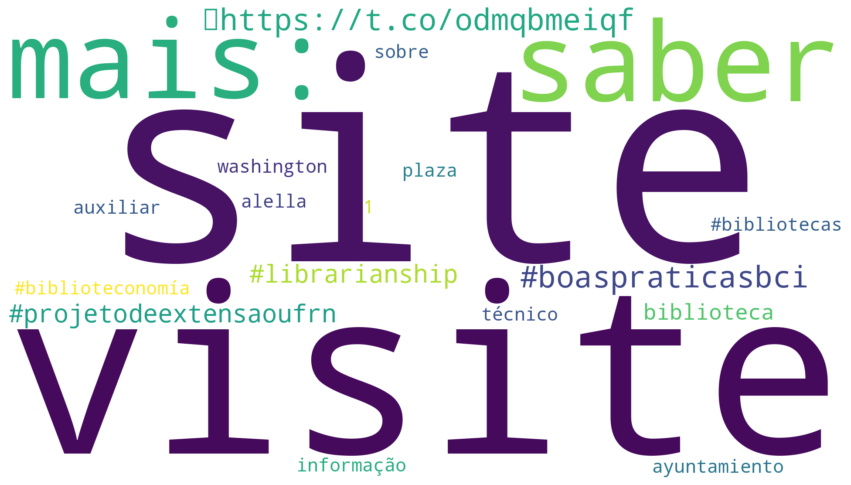

In [35]:
# Criar a nuvem de palavras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1920,
                      height=1080,
                      max_words=20,
                      prefer_horizontal=1).generate_from_frequencies(frequencia_palavras)
frequencia_palavras

# Plotar a nuvem de palavras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
